# Regresion Logistica para clasificación

# Este es un set de datos que contiene datos de clientes con su genero, edad, salario estimado y si realizaron o no una compra. La idea es predecir si compraran o no en el futuro

In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib
import seaborn as sns
from scipy.stats import shapiro
import pylab


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Utilizo la API de Kaggle para obtener el set de datos

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshrau/social-network-ads")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rakeshrau/social-network-ads/versions/1


# Veo la path del archivo

In [3]:
import os


print("Archivos en el dataset:", os.listdir(path))

Archivos en el dataset: ['Social_Network_Ads.csv']


# Accedo al dateset

In [4]:
# Accedo al dataset
file_path = os.path.join(path, "Social_Network_Ads.csv")  # Ajusta el nombre según el archivo real
dataset = pd.read_csv(file_path)

# Mostrar las primeras filas
display(dataset.sample(15))


,User ID,Gender,Age,EstimatedSalary,Purchased
246,15638003,Female,35,50000,0
264,15600379,Male,48,90000,1
327,15785170,Female,42,75000,0
300,15736397,Female,58,38000,1
56,15775562,Female,23,48000,0
384,15806901,Female,57,33000,1
83,15711218,Male,35,88000,0
31,15729054,Female,27,137000,1
237,15753874,Female,37,80000,0
267,15581282,Male,37,74000,0


## **Comienzo a analizar los datos**

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.shape

(400, 5)

In [27]:
#cheque nulos
dataset.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


## **Analizo la distribucion de la gente que compro**

In [7]:
np.average(dataset.Purchased)  #El 35% si compro independientemente del las demas variables

np.float64(0.3575)

In [29]:
dataset['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


<Axes: ylabel='Purchased'>

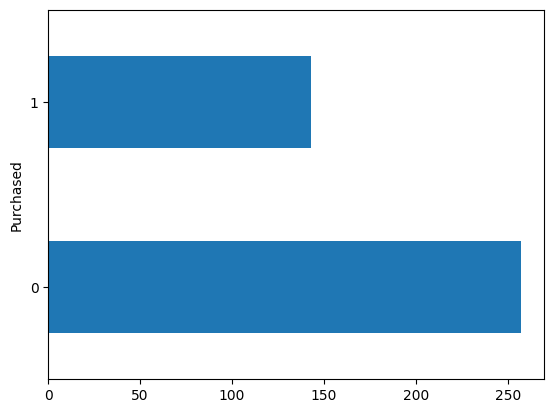

In [8]:
dataset['Purchased'].value_counts().plot(kind='barh')

# Separo los datos

In [9]:
  #Se coloca .values porque estos datos se pasaran a un modelo matematicos esto facilita el desempeño del modelo
x = dataset.iloc[:,[2,3]].values #Variables independientes
y = dataset.iloc[:,4].values     #Variables dependientes

# Train set y Test Set

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [11]:
print(pd.DataFrame(x_train).info())
print(pd.DataFrame(x_test).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       320 non-null    int64
 1   1       320 non-null    int64
dtypes: int64(2)
memory usage: 5.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       80 non-null     int64
 1   1       80 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB
None


## **Escalado de datos**

In [12]:
from sklearn.preprocessing import StandardScaler
standard_x = StandardScaler()
x_train = standard_x.fit_transform(x_train)     #Escalo y fiteo la variables independientes
x_test = standard_x.transform(x_test)           #Solo Escalo las variables de testeo porque fit_transform() recalcula la media y varianza de x_test, lo cual es incorrecto.
                                                #Debo aplicar la transformación con transform(), usando la media y varianza calculadas en x_train.

In [13]:
x_test

array([[ 1.44085031, -1.03608519],
       [ 1.25207975,  2.22981571],
       [ 1.06330919,  2.08401656],
       [-0.25808475, -0.36540911],
       [ 0.78015334,  0.13030799],
       [-0.91878172,  1.55913963],
       [ 1.34646503, -0.91944587],
       [ 0.30822693, -0.30708945],
       [ 0.87453862, -0.54036809],
       [-1.20193757,  0.27610713],
       [ 1.06330919,  0.13030799],
       [ 2.10154728,  0.94678321],
       [-0.25808475, -0.89028604],
       [ 0.02507109,  0.0428285 ],
       [-0.73001116, -0.21960997],
       [-0.25808475, -1.240204  ],
       [ 0.21384165, -0.24876979],
       [ 0.4969975 ,  1.73409861],
       [-1.76824926, -1.26936382],
       [-1.10755229,  0.30526696],
       [-0.5412406 ,  2.34645502],
       [-1.76824926,  0.01366867],
       [ 0.02507109, -0.24876979],
       [-0.35247004, -0.77364672],
       [-0.25808475, -0.7444869 ],
       [-1.10755229,  1.41334048],
       [ 0.68576806, -1.09440485],
       [-1.10755229,  0.48022594],
       [-1.39070813,

In [14]:
 #Manejo del desbalance de clases (Opción: SMOTE)
from imblearn.over_sampling import SMOTE  # Opcional para balanceo de clases
smote = SMOTE(random_state=0)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Entrenamiento del modelo de Regresion Logistica

In [15]:
#Entrenamiento
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,class_weight='balanced')
classifier.fit(x_train,y_train) #como paremetros se pasan las variables independientes y las variables dependientes

LogisticRegression(class_weight='balanced', random_state=0)

In [16]:
#Prediccion
y_pred = classifier.predict(x_test)

# Comparo las predicciones

In [17]:
y_test, y_pred

(array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]),
 array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]))

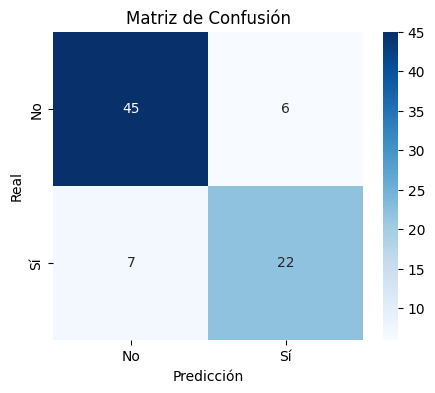

In [18]:
#Lo veo graficamente

from sklearn.metrics import confusion_matrix

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


# Cómo interpretar los valores

##**Verdaderos Negativos (VN): Casos donde el modelo predijo correctamente "No".**

##**Falsos Positivos (FP): Casos donde el modelo predijo "Sí" pero en realidad era "No" (Error Tipo I).**

##**Falsos Negativos (FN): Casos donde el modelo predijo "No" pero en realidad era "Sí" (Error Tipo II).**

##**Verdaderos Positivos (VP): Casos donde el modelo predijo correctamente "Sí".**

## **VN = 45: 45 "No" correctos.**

## **FP = 6: 6 "No" erroneamente clasificados como "Sí".**

## **FN = 7: 7 "Sí" erroneamente clasificados como "No".**

## **VP = 22: 22 "Sí" correctos.**

In [26]:
#vemos el porcentaje de prediccion
print(len(y_test))   #Cantidad total de datos
45/len(y_test)       #Porcentaje predicho con efectividad

80


0.5625

In [20]:
# 4️⃣ Evaluación del modelo
y_pred = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8375
Matriz de Confusión:
 [[45  6]
 [ 7 22]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        51
           1       0.79      0.76      0.77        29

    accuracy                           0.84        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



# Mejoramos el modelo con optimizacion de hiperparámetros

In [21]:
 #Optimización de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'lbfgs', 'saga']
}

grid = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Mejores parámetros:", grid.best_params_)

Mejores parámetros: {'C': 0.1, 'solver': 'liblinear'}


In [22]:
# Entrenar con los mejores parámetros
best_classifier = LogisticRegression(random_state=0, **grid.best_params_, class_weight='balanced')
best_classifier.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=0,
                   solver='liblinear')

In [23]:
# Nueva evaluación
y_pred_best = best_classifier.predict(x_test)
print("Accuracy con mejores parámetros:", accuracy_score(y_test, y_pred_best))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_best))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_best))

Accuracy con mejores parámetros: 0.825
Matriz de Confusión:
 [[43  8]
 [ 6 23]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        51
           1       0.74      0.79      0.77        29

    accuracy                           0.82        80
   macro avg       0.81      0.82      0.81        80
weighted avg       0.83      0.82      0.83        80



# Si bien se aplicaron los reajustes necesarios en el modelo con la finalidad de mejorar las metricas del modelo... Las metricas no cambiaron demasiado.
# Esto puede significar que el modelo llego a su limite de rendimiento optimo, y quizas sea mejor aplicar otro tipo de modelo mas complejo.
# Como por ejemplo: árboles de decisión, random forest o redes neuronales. O inclusive modelos más flexibles como Random Forest o XGBoost, que pueden capturar relaciones más complejas.

# **Recomendaciones Adicionales:**

## **Si la clase 1 es más importante (En este caso que tenga altas posibilidades de comprar), considerar técnicas para mejorar su recall, como:**

## Balanceo de clases (oversampling/undersampling)

## Ajuste del umbral de clasificación

## Evaluar si los costos de los falsos positivos y falsos negativos son equivalentes en tu contexto de negocio

## Considerar validación cruzada para asegurar que estos resultados son consistentes

# **El modelo es razonablemente bueno en general, pero podría optimizarse según qué tipo de error sea más costoso en tu aplicación específica.**

